# Diabetes prediction solution

In [1]:
# Your code here
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

#### Step 1: Data collection

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Step 2: Perform a full EDA

In [3]:
# Obtain dimensions
data.shape

(768, 9)

In [4]:
print(f"The DataFrame contains {len(data)} records (rows) and {len(data.columns)} variables (columns).\n")

The DataFrame contains 768 records (rows) and 9 variables (columns).



In [5]:
# Obtain information about data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data_c=data.copy()
data_c.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Eliminate duplicates

In [7]:
data_c = data.drop_duplicates().reset_index(drop = True)
data_c.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
Outcome=pd.DataFrame(data_c["Outcome"].value_counts())
Outcome.columns = ["Count"]
Outcome["Probability"]=Outcome["Count"]*(100/len(data_c))
Outcome

,Count,Probability
Outcome,,
0,500,65.104167
1,268,34.895833


In [8]:
numerical_columns=[data_c.columns]
numerical_columns

[Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       dtype='object')]

<Axes: >

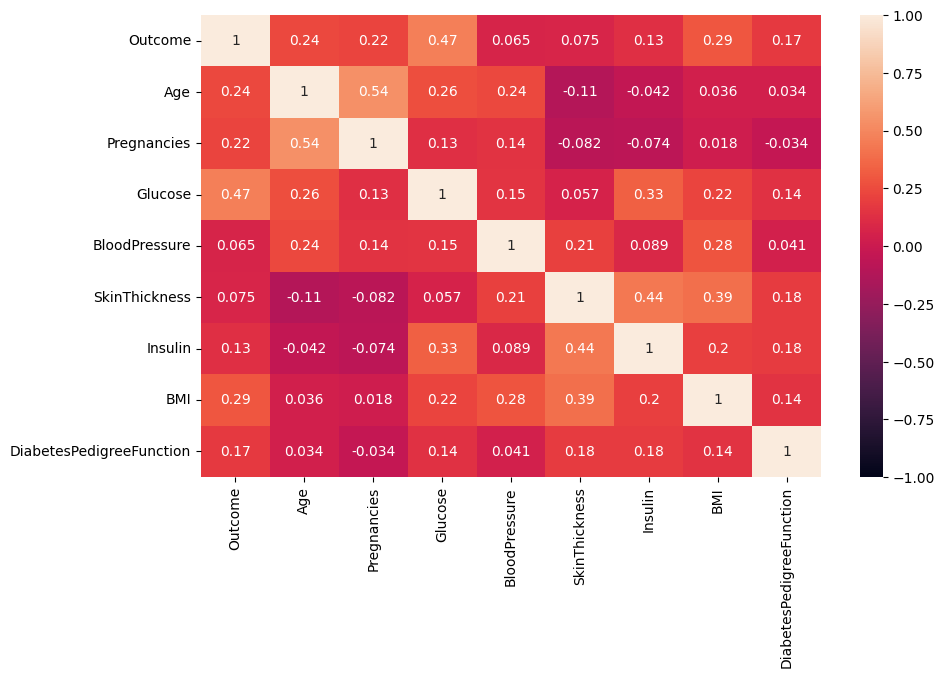

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data_c[['Outcome', 'Age', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']].corr().round(3),vmax=1,vmin=-1,annot=True)

### Step 3: Build a decision tree

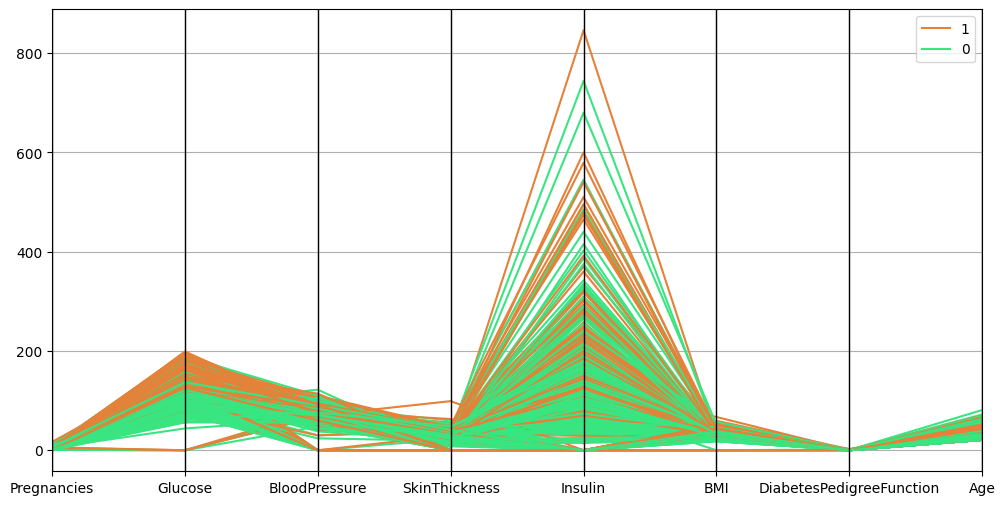

In [10]:
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(data_c, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [54]:
X=data_c[['Age', 'Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']]
Y=data_c[['Outcome']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [56]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [58]:
confusion_m = pd.DataFrame(confusion_matrix(y_test, predictions), columns=['Diabetes', 'No Diabetes'], index=['Yes', 'No'])
confusion_m

,Diabetes,No Diabetes
Yes,81,17
No,26,30


In [59]:
accuracy_score(y_test, predictions)

0.7207792207792207

In [60]:
model.feature_importances_

array([0.13152821, 0.05343814, 0.33898961, 0.03692039, 0.04594936,
       0.22299898, 0.17017531])

### Step 4: Optimize the previous model

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [62]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [63]:
model = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [64]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [65]:
accuracy_score(y_test, y_pred)

0.7207792207792207

### Step 5: Save the model

In [66]:
from pickle import dump

dump(model, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))